In [1]:
import os
os.getcwd()

'C:\\Users\\kanur\\Desktop\\Projects\\production management'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

"""
import warnings
warnings.filterwarnings('ignore')
"""

"\nimport warnings\nwarnings.filterwarnings('ignore')\n"

In [3]:
data = pd.read_csv("manufacturing dataset.csv")
dataset = pd.DataFrame(data)
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
dataset.shape

(1567, 592)

In [5]:
dataset.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
dataset.columns = 'features_'+dataset.columns

In [7]:
dataset.head(1)

,features_Time,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,...,features_581,features_582,features_583,features_584,features_585,features_586,features_587,features_588,features_589,features_Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1


In [8]:
dataset.rename(columns = {'features_Time': 'Time'}, inplace=True)
dataset.rename(columns = {'features_Pass/Fail': 'Pass_Fail'}, inplace=True)

In [9]:
dataset.head(1)

,Time,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,...,features_581,features_582,features_583,features_584,features_585,features_586,features_587,features_588,features_589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass_Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [11]:
dataset.dtypes

Time             object
features_0      float64
features_1      float64
features_2      float64
features_3      float64
                 ...   
features_586    float64
features_587    float64
features_588    float64
features_589    float64
Pass_Fail         int64
Length: 592, dtype: object

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
features_0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
features_1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
features_2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
features_3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
features_4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
features_586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
features_587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
features_588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
features_589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [13]:
dataset.isnull().sum()

Time             0
features_0       6
features_1       7
features_2      14
features_3      14
                ..
features_586     1
features_587     1
features_588     1
features_589     1
Pass_Fail        0
Length: 592, dtype: int64

In [14]:
dataset.isna().sum()

Time             0
features_0       6
features_1       7
features_2      14
features_3      14
                ..
features_586     1
features_587     1
features_588     1
features_589     1
Pass_Fail        0
Length: 592, dtype: int64

In [15]:
df = dataset.iloc[:,1:]
df = df.apply(lambda x:x.fillna(0), axis=0)
# axis=0 - row wise
df2 = dataset.iloc[:,0]
result = pd.concat([df, df2], axis=1).reindex(df.index)
# axis=1

In [16]:
result.head(2)

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_582,features_583,features_584,features_585,features_586,features_587,features_588,features_589,Pass_Fail,Time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.000,0.0000,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1,2008-07-19 12:32:00


In [17]:
result.isnull().any()

features_0      False
features_1      False
features_2      False
features_3      False
features_4      False
                ...  
features_587    False
features_588    False
features_589    False
Pass_Fail       False
Time            False
Length: 592, dtype: bool

In [18]:
result['Pass_Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass_Fail, dtype: float64

In [19]:
result['Pass_Fail'].value_counts()

-1    1463
 1     104
Name: Pass_Fail, dtype: int64

<AxesSubplot:>

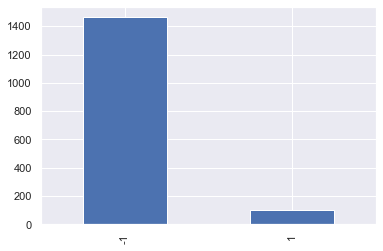

In [20]:
result['Pass_Fail'].value_counts().plot(kind='bar')

In [21]:
corr = result.corr()
print(corr)

              features_0  features_1  features_2  features_3  features_4  \
features_0      1.000000   -0.047782    0.007590    0.009448   -0.000915   
features_1     -0.047782    1.000000   -0.030448    0.006021    0.002192   
features_2      0.007590   -0.030448    1.000000    0.323782    0.020438   
features_3      0.009448    0.006021    0.323782    1.000000   -0.054015   
features_4     -0.000915    0.002192    0.020438   -0.054015    1.000000   
...                  ...         ...         ...         ...         ...   
features_586    0.044745   -0.009219    0.015733    0.038755   -0.043693   
features_587    0.005233    0.039479   -0.007090   -0.038371   -0.030930   
features_588    0.003918    0.040500   -0.009122   -0.033648   -0.026046   
features_589    0.021489    0.044464   -0.030434   -0.084449    0.050741   
Pass_Fail       0.006149   -0.019672    0.024929   -0.016341   -0.013577   

              features_5  features_6  features_7  features_8  features_9  ...  \
featur

In [22]:
result.columns

Index(['features_0', 'features_1', 'features_2', 'features_3', 'features_4',
       'features_5', 'features_6', 'features_7', 'features_8', 'features_9',
       ...
       'features_582', 'features_583', 'features_584', 'features_585',
       'features_586', 'features_587', 'features_588', 'features_589',
       'Pass_Fail', 'Time'],
      dtype='object', length=592)

In [23]:
from datetime import datetime
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['min'] = pd.DatetimeIndex(result['Time']).minute

In [24]:
result.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_589,Pass_Fail,Time,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,-1,2008-07-19 11:55:00,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,-1,2008-07-19 12:32:00,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,1,2008-07-19 13:17:00,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,-1,2008-07-19 14:43:00,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,73.8432,-1,2008-07-19 15:22:00,2008,7,19,5,15:22:00,15,22


In [25]:
result.year.unique()

array([2008], dtype=int64)

In [26]:
result.month.unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [27]:
result.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  8, 13, 15, 16, 17, 18,
       24,  9, 14, 26, 10], dtype=int64)

In [28]:
result.week_day.unique()

array([5, 6, 0, 1, 2, 4, 3], dtype=int64)

In [29]:
result.hour.unique()

array([11, 12, 13, 14, 15, 17, 19, 20, 21, 22,  3,  8,  0,  2,  5,  4,  9,
       16, 23,  6, 18,  7, 10,  1], dtype=int64)

<Figure size 432x432 with 0 Axes>

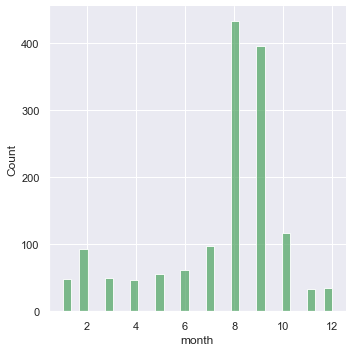

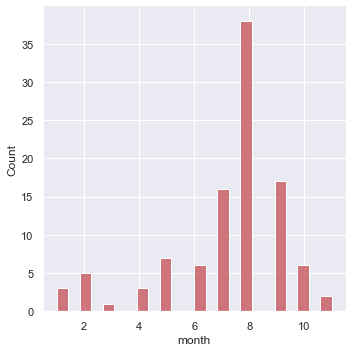

In [30]:
# Green represents failure in months
# Red represents success varying in months
plt.figure(figsize=(6,6))
sns.displot(result[result.Pass_Fail==-1]['month'],color='g')
sns.displot(result[result.Pass_Fail==1]['month'],color='r')

<Figure size 432x432 with 0 Axes>

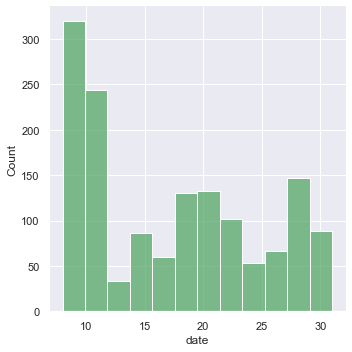

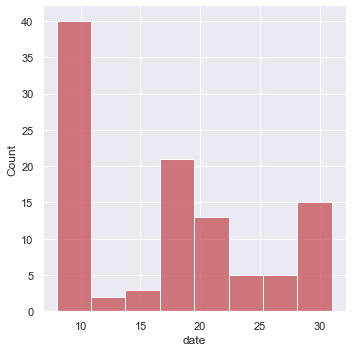

In [31]:
# Green represents failure 
# Red represents success
plt.figure(figsize=(6,6))
sns.displot(result[result.Pass_Fail==-1]['date'],color='g')
sns.displot(result[result.Pass_Fail==1]['date'],color='r')

<Figure size 432x432 with 0 Axes>

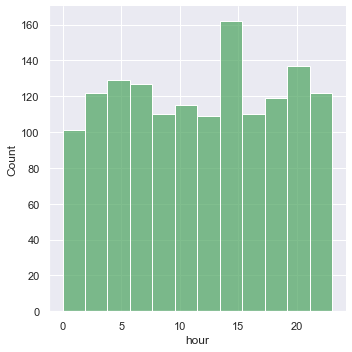

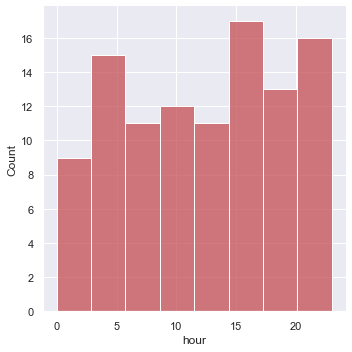

In [32]:
# Green represents failure 
# Red represents success
plt.figure(figsize=(6,6))
sns.displot(result[result.Pass_Fail==-1]['hour'],color='g')
sns.displot(result[result.Pass_Fail==1]['hour'],color='r')
# the graph represents success rate is near failure rate also in measure of particular/indivisual time.

# Diving the dataset into input (X) and target (Y)

In [33]:
# result.head()
# Now we should divide out input features and target features 
x= result.drop(['Pass_Fail','Time','year','start_time'], axis=1)
y=result['Pass_Fail']

In [34]:
x.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_585,features_586,features_587,features_588,features_589,month,date,week_day,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,2.3630,0.0000,0.0000,0.0000,0.0000,7,19,5,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,4.4447,0.0096,0.0201,0.0060,208.2045,7,19,5,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,3.1745,0.0584,0.0484,0.0148,82.8602,7,19,5,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,2.0544,0.0202,0.0149,0.0044,73.8432,7,19,5,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,99.3032,0.0202,0.0149,0.0044,73.8432,7,19,5,15,22


In [35]:
y.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass_Fail, dtype: int64

# Now time to do feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x_scaler= scaler.fit_transform(x)

In [38]:
x_scaler

array([[ 0.13999828,  0.42920791,  0.03273532, ...,  0.91969925,
        -0.11346408,  1.48216024],
       [ 0.46402024, -0.10587396,  0.23685169, ...,  0.91969925,
         0.03191467,  0.14686372],
       [-0.35125598,  0.40723307,  0.02641324, ...,  0.91969925,
         0.17729342, -0.72398184],
       ...,
       [-0.12041844, -0.5678868 ,  0.12151173, ...,  0.41667352,
        -0.98573659, -0.2014745 ],
       [-0.53957345,  0.25606135, -0.01842658, ...,  0.41667352,
        -0.84035784, -1.65288376],
       [-0.28974927, -0.18370602,  0.06960583, ...,  0.41667352,
        -0.84035784, -1.30454554]])

In [39]:
# After scaling input variable put it to the variable 'x' for more clearance.
x=pd.DataFrame(x_scaler,columns=x.columns[:])

In [40]:
x.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_585,features_586,features_587,features_588,features_589,month,date,week_day,hour,min
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159,-0.160434,0.230068,0.919699,-0.113464,1.482160
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,0.385516,-0.958144,0.412587,0.251029,1.156951,-0.160434,0.230068,0.919699,0.031915,0.146864
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,0.030373,2.989383,3.624211,3.318999,-0.178407,-0.160434,0.230068,0.919699,0.177293,-0.723982
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469,-0.160434,0.230068,0.919699,0.322672,0.785484
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,26.907579,-0.100689,-0.177535,-0.306784,-0.274469,-0.160434,0.230068,0.919699,0.468051,-0.433700


In [41]:
# here you can find that complete data imbalance is in target feature.
y.value_counts()

-1    1463
 1     104
Name: Pass_Fail, dtype: int64

In [42]:
# So, We will use Oversampling method to make the target feature balanced. Oversampling basically copy paste the majority class
# into minority class so we can go for work with model to predict.. 
import imblearn

In [43]:
# RandomOverSampler is overfitting one solution.it will makeup the both class equal.
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
from collections import Counter
print(Counter(y))
print("*****"*5)
print(Counter(y_ros))

Counter({-1: 1463, 1: 104})
*************************
Counter({-1: 1463, 1: 1463})


In [45]:
y_ros.value_counts()

-1    1463
 1    1463
Name: Pass_Fail, dtype: int64

In [46]:
x_ros.shape

(2926, 595)

# PCA Algorith Model ################################

In [47]:
# Now as we can notice we have so many input features so why not checking how significance(important) are these before-
# proceeding for creation of the models.
# for this PCA is very good method for dimension reduction method. Principal Component Analysis 
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x_ros)
x_pca.shape
# pca=PCA(0.95) means that It will check every input features and will compare too each other and when it find 0.95% significant
# then it will accept those feature other wise deny it those who don't come under 95%

(2926, 145)

In [48]:
# Now as you can see the input feature are now reduced from 595 to 145. 
# Now split the data into test and training data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x_pca,y_ros,test_size=0.3,random_state=1)

In [49]:
# Now building the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #kernal= Linear, Poly, Sigmoid , rbf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
#from xgboost import XGBClassifier
# Now Deep Learning libraries

# import tensorflow as tf
# from tensorflow import keras
# from keras import Sequential
# from keras.layers import Dense

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,f1_score,recall_score

In [50]:
rforest= RandomForestClassifier(n_estimators=500,criterion='entropy' ) # gini is always used when some character value are there for numerical value entropy is the crieteria.
rforest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [51]:
y_pred_train=rforest.predict(x_train)
y_pred_test=rforest.predict(x_test)

In [52]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[1019    0]
 [   0 1029]]
[[444   0]
 [  0 434]]


In [53]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00      1029

    accuracy                           1.00      2048
   macro avg       1.00      1.00      1.00      2048
weighted avg       1.00      1.00      1.00      2048

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       434

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



In [54]:
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [55]:
# it is very Overfitting( Because model works well with training data, but with test data it is performing very poor.)
# So for that We have to go for another classificaion model

# Logistic Regression ################################################

In [56]:
dataset=pd.read_csv('manufacturing dataset.csv')
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [57]:
dataset.columns = 'features_'+dataset.columns

In [58]:
dataset.rename(columns = {'features_Time': 'Time'}, inplace=True)
dataset.rename(columns = {'features_Pass/Fail': 'Pass_Fail'}, inplace=True)

In [59]:
df = dataset.iloc[:,1:]
df = df.apply(lambda x:x.fillna(0), axis=0)
# axis=0 - row wise
df2 = dataset.iloc[:,0]
result = pd.concat([df, df2], axis=1).reindex(df.index)

In [60]:
from datetime import datetime
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['min'] = pd.DatetimeIndex(result['Time']).minute

In [61]:
x= result.drop(['Pass_Fail','Time','year','start_time'], axis=1)
y=result['Pass_Fail']

In [62]:
x.shape

(1567, 595)

In [63]:
y.value_counts()

-1    1463
 1     104
Name: Pass_Fail, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\kanur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred= logmodel.predict(x_train)

In [67]:
x_pred= logmodel.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,f1_score,recall_score

In [69]:
accuracy_score(y_train,y_pred)

0.9306569343065694

In [70]:
accuracy_score(y_test,x_pred)

0.9256900212314225

In [71]:
print("Classification report of training data",classification_report(y_train,y_pred))

Classification report of training data               precision    recall  f1-score   support

          -1       0.94      0.99      0.96      1024
           1       0.25      0.03      0.05        72

    accuracy                           0.93      1096
   macro avg       0.59      0.51      0.51      1096
weighted avg       0.89      0.93      0.90      1096



In [72]:
print("Classification report of training data",classification_report(y_test,x_pred))

Classification report of training data               precision    recall  f1-score   support

          -1       0.93      0.99      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [73]:
print("confusion_matrix of train data:\n",confusion_matrix(y_train,y_pred))

confusion_matrix of train data:
 [[1018    6]
 [  70    2]]


In [74]:
print("confusion_matrix of train data:\n",confusion_matrix(y_test,x_pred))

confusion_matrix of train data:
 [[436   3]
 [ 32   0]]


## using Standard Scaler and randomOversampler for balancing the imbalance data then perform logistic Regression ##

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [76]:
scaler.fit(x,y)

StandardScaler()

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [78]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
from collections import Counter
print(Counter(y))
print("*****"*5)
print(Counter(y_ros))

Counter({-1: 1463, 1: 104})
*************************
Counter({-1: 1463, 1: 1463})


In [79]:
x=x_ros
y=y_ros

In [80]:
x.shape

(2926, 595)

In [81]:
y.value_counts()

-1    1463
 1    1463
Name: Pass_Fail, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [84]:
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()

In [85]:
lgmodel.fit(x_train,y_train)

C:\Users\kanur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
pred_x_train=lgmodel.predict(x_train)

In [87]:
pred_x_test=lgmodel.predict(x_test)

In [88]:
accuracy_score(y_train,pred_x_train)

0.6877551020408164

In [89]:
accuracy_score(y_test,pred_x_test)

0.6759834368530021

In [90]:
print("Classification report of training data",classification_report(y_train,pred_x_train))

Classification report of training data               precision    recall  f1-score   support

          -1       0.69      0.68      0.68       979
           1       0.69      0.70      0.69       981

    accuracy                           0.69      1960
   macro avg       0.69      0.69      0.69      1960
weighted avg       0.69      0.69      0.69      1960



In [91]:
print("Classification report of training data",classification_report(y_test,pred_x_test))

Classification report of training data               precision    recall  f1-score   support

          -1       0.68      0.66      0.67       484
           1       0.67      0.69      0.68       482

    accuracy                           0.68       966
   macro avg       0.68      0.68      0.68       966
weighted avg       0.68      0.68      0.68       966



In [92]:
print("confusion_matrix of train data:\n",confusion_matrix(y_train,pred_x_train))

confusion_matrix of train data:
 [[665 314]
 [298 683]]


In [93]:
print("confusion_matrix of train data:\n",confusion_matrix(y_test,pred_x_test))

confusion_matrix of train data:
 [[321 163]
 [150 332]]


# Decision Tree Classifier #######################################

In [94]:
x_train.shape

(1960, 595)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [96]:
scaler.fit(x,y)

StandardScaler()

In [97]:
from imblearn.over_sampling import RandomOverSampler

In [98]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
from collections import Counter
print(Counter(y))
print("*****"*5)
print(Counter(y_ros))

Counter({-1: 1463, 1: 1463})
*************************
Counter({-1: 1463, 1: 1463})


In [99]:
x=x_ros
y=y_ros

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [102]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion= "entropy", random_state=1)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [103]:
pred_y_train=classifier.predict(x_train)
pred_y_test=classifier.predict(x_test)

In [104]:
accuracy_score(y_train,pred_y_train)

1.0

In [105]:
accuracy_score(y_test,pred_y_test)

0.94824016563147

In [106]:
print("Classification report of training data",classification_report(y_train,pred_y_train))

Classification report of training data               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       981

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [107]:
print("confusion_matrix of train data:\n",confusion_matrix(y_test,pred_y_test))

confusion_matrix of train data:
 [[434  50]
 [  0 482]]


In [108]:
from sklearn.metrics import roc_auc_score

In [109]:
roc_auc_score(y_train,pred_y_train)

1.0

In [110]:
roc_auc_score(y_test,pred_y_test)

0.9483471074380165

# Run through gridsearchcv ##########

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
params=[{"criterion": ['gini','entropy'],'max_depth': range(2,10)}]

In [113]:
model=DecisionTreeClassifier()

In [114]:
modelCV=GridSearchCV(model,params,cv=10,scoring="roc_auc")

In [115]:
modelCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [116]:
modelCV.best_score_

0.9266707433376604

In [117]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

# KNN model #########################

In [118]:
x.shape

(2926, 595)

In [119]:
y.shape

(2926,)

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()

In [122]:
scaler.fit(x,y)

StandardScaler()

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [125]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [126]:
y_pred_train=knn.predict(x_train)

In [127]:
y_pred_test=knn.predict(x_test)

In [128]:
print("Confusion matrix\n",confusion_matrix(y_train,y_pred_train))

Confusion matrix
 [[ 934   85]
 [   0 1029]]


In [129]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred_test))

Confusion matrix
 [[381  63]
 [  0 434]]


In [130]:
print("Classification Report\n",classification_report(y_train,y_pred_train))

Classification Report
               precision    recall  f1-score   support

          -1       1.00      0.92      0.96      1019
           1       0.92      1.00      0.96      1029

    accuracy                           0.96      2048
   macro avg       0.96      0.96      0.96      2048
weighted avg       0.96      0.96      0.96      2048



In [131]:
print("Classification Report\n",classification_report(y_test,y_pred_test))

Classification Report
               precision    recall  f1-score   support

          -1       1.00      0.86      0.92       444
           1       0.87      1.00      0.93       434

    accuracy                           0.93       878
   macro avg       0.94      0.93      0.93       878
weighted avg       0.94      0.93      0.93       878



In [132]:
accuracy_score(y_train,y_pred_train)

0.95849609375

In [133]:
accuracy_score(y_test,y_pred_test)

0.928246013667426

# Run This algorithm Through GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
params=[{'n_neighbors': range(3,10), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'canberra']}]

In [136]:
modelCV=GridSearchCV(KNeighborsClassifier(),params,cv=10,scoring='roc_auc')

In [137]:
modelCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc')

In [138]:
modelCV.best_score_

0.9583315519881348

In [139]:
modelCV.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [140]:
y_pred=modelCV.predict(x_test)

In [141]:
from sklearn.metrics import roc_auc_score

In [142]:
roc_auc_score(y_test, modelCV.predict_proba(x_test)[:,1])

0.9538288288288288

# SVM Model ###############

In [143]:
x.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_585,features_586,features_587,features_588,features_589,month,date,week_day,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,2.3630,0.0000,0.0000,0.0000,0.0000,7,19,5,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,4.4447,0.0096,0.0201,0.0060,208.2045,7,19,5,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,3.1745,0.0584,0.0484,0.0148,82.8602,7,19,5,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,2.0544,0.0202,0.0149,0.0044,73.8432,7,19,5,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,99.3032,0.0202,0.0149,0.0044,73.8432,7,19,5,15,22


In [144]:
y.shape

(2926,)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [146]:
scaler.fit(x,y)

StandardScaler()

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [148]:
from sklearn.svm import SVC

In [149]:
svc=SVC() # we will go with default kernal

In [150]:
svc.fit(x_train,y_train)

SVC()

In [151]:
y_pred_test=svc.predict(x_test)

In [152]:
y_pred_train=svc.predict(x_train)

In [153]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_score(y_test,y_pred_test)

0.6343963553530751

In [154]:
accuracy_score(y_train,y_pred_train)

0.6533203125

In [155]:
print("Classification Report \n",classification_report(y_pred_test,y_test))
print("Classification Report \n",classification_report(y_pred_train,y_train))

Classification Report 
               precision    recall  f1-score   support

          -1       0.52      0.69      0.59       342
           1       0.75      0.60      0.67       536

    accuracy                           0.63       878
   macro avg       0.64      0.64      0.63       878
weighted avg       0.66      0.63      0.64       878

Classification Report 
               precision    recall  f1-score   support

          -1       0.57      0.68      0.62       848
           1       0.74      0.64      0.68      1200

    accuracy                           0.65      2048
   macro avg       0.65      0.66      0.65      2048
weighted avg       0.67      0.65      0.66      2048



In [156]:
print("Confusion Matrix for test Data \n",confusion_matrix(y_pred_test,y_test))
print("Confusion Matrix Training Data\n",confusion_matrix(y_pred_train,y_train))

Confusion Matrix for test Data 
 [[235 107]
 [214 322]]
Confusion Matrix Training Data
 [[576 272]
 [438 762]]


# SVM with Linear Kernal

In [ ]:
# svcL=SVC(kernel='linear')
# svcL.fit(x_train,y_train)

In [158]:
# y_pred_test=svcL.predict(x_test)
# y_pred_train=svcL.predict(x_train)

In [159]:
# print("Accuracy :",accuracy_score(y_pred_test,y_test))
# print("Accuracy :",accuracy_score(y_pred_train,y_train))

In [160]:
# print("Classification Report \n",classification_report(y_pred_test,y_test))
# print("Classification Report \n",classification_report(y_pred_train,y_train))

In [161]:
# print("Confusion Matrix for test Data \n",confusion_matrix(y_pred_test,y_test))
# print("Confusion Matrix Training Data\n",confusion_matrix(y_pred_train,y_train))

# SVM with Polynomial Kernal

In [162]:
svcP=SVC(kernel='poly')
svcP.fit(x_train,y_train)

SVC(kernel='poly')

In [163]:
y_pred_test=svcP.predict(x_test)
y_pred_train=svcP.predict(x_train)

In [164]:
print("Accuracy for test Data \n",accuracy_score(y_pred_test,y_test))
print("Accuracy for train Data \n",accuracy_score(y_pred_train,y_train))

Accuracy for test Data 
 0.6560364464692483
Accuracy for train Data 
 0.66162109375


In [165]:
print("Classification Report \n",classification_report(y_pred_test,y_test))
print("Classification Report \n",classification_report(y_pred_train,y_train))

Classification Report 
               precision    recall  f1-score   support

          -1       0.63      0.68      0.65       415
           1       0.69      0.64      0.66       463

    accuracy                           0.66       878
   macro avg       0.66      0.66      0.66       878
weighted avg       0.66      0.66      0.66       878

Classification Report 
               precision    recall  f1-score   support

          -1       0.64      0.66      0.65       979
           1       0.68      0.66      0.67      1069

    accuracy                           0.66      2048
   macro avg       0.66      0.66      0.66      2048
weighted avg       0.66      0.66      0.66      2048



In [166]:
print("Confusion Matrix for test Data \n",confusion_matrix(y_pred_test,y_test))
print("Confusion Matrix Training Data\n",confusion_matrix(y_pred_train,y_train))

Confusion Matrix for test Data 
 [[281 134]
 [168 295]]
Confusion Matrix Training Data
 [[650 329]
 [364 705]]


# SVM with Sigmoid

In [167]:
svcS=SVC(kernel='sigmoid')
svcS.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [168]:
y_pred_test=svcS.predict(x_test)
y_pred_train=svcS.predict(x_train)

In [169]:
print("Accuracy for test Data \n",accuracy_score(y_pred_test,y_test))
print("Accuracy for train Data \n",accuracy_score(y_pred_train,y_train))

Accuracy for test Data 
 0.5216400911161732
Accuracy for train Data 
 0.53173828125


In [170]:
print("Classification Report \n",classification_report(y_pred_test,y_test))
print("Classification Report \n",classification_report(y_pred_train,y_train))

Classification Report 
               precision    recall  f1-score   support

          -1       0.48      0.54      0.51       403
           1       0.56      0.51      0.54       475

    accuracy                           0.52       878
   macro avg       0.52      0.52      0.52       878
weighted avg       0.53      0.52      0.52       878

Classification Report 
               precision    recall  f1-score   support

          -1       0.53      0.53      0.53      1013
           1       0.54      0.54      0.54      1035

    accuracy                           0.53      2048
   macro avg       0.53      0.53      0.53      2048
weighted avg       0.53      0.53      0.53      2048



In [171]:
print("Confusion Matrix for test Data \n",confusion_matrix(y_pred_test,y_test))
print("Confusion Matrix Training Data\n",confusion_matrix(y_pred_train,y_train))

Confusion Matrix for test Data 
 [[216 187]
 [233 242]]
Confusion Matrix Training Data
 [[534 479]
 [480 555]]
